<a href="https://colab.research.google.com/github/zrosen3/Colombian-peso-counterfeit-detection/blob/main/Code/log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [2]:
#Set up google colab working environment
%cd /content/
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code       

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21239, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 21239 (delta 163), reused 221 (delta 127), pack-reused 20965
Receiving objects: 100% (21239/21239), 441.00 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (257/257), done.
Updating files: 100% (62417/62417), done.
/content/Colombian-peso-counterfeit-detection/Code


In [3]:
import matplotlib.pyplot as plt #For plotting our visualizations
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import common_functions as cf


#Load in data

In [4]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData()


Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## Run logistic regression model

In [5]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(480, 640, 3)),
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(
                units = 13,
               activation = "softmax"
        )])
        
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5)

Epoch 1/5
390/390 [==============================] - 123s 312ms/step - loss: 33.0804 - accuracy: 0.5266 - val_loss: 8.6345 - val_accuracy: 0.7325
Epoch 2/5
390/390 [==============================] - 116s 294ms/step - loss: 11.3430 - accuracy: 0.7579 - val_loss: 13.5853 - val_accuracy: 0.6613
Epoch 3/5
390/390 [==============================] - 126s 320ms/step - loss: 11.4236 - accuracy: 0.7791 - val_loss: 9.5548 - val_accuracy: 0.7493
Epoch 4/5
390/390 [==============================] - 110s 282ms/step - loss: 8.3030 - accuracy: 0.8410 - val_loss: 2.4030 - val_accuracy: 0.9007
Epoch 5/5
390/390 [==============================] - 106s 272ms/step - loss: 7.3773 - accuracy: 0.8610 - val_loss: 15.9630 - val_accuracy: 0.7697


## Inspect model performance

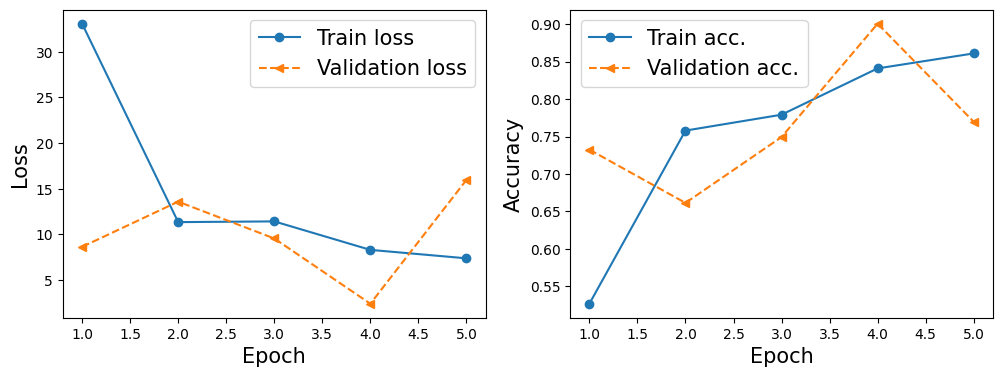

130/130 - 13s - loss: 15.2237 - accuracy: 0.7733 - 13s/epoch - 102ms/step
Test loss: 15.223749160766602 | Test accuracy: 0.7733173370361328


(0.861046552658081, 0.7697115540504456, 0.7733173370361328)

In [6]:
cf.EvaluateModel(model, test_ds, history)

In [7]:
y_pred_probs, y_test, y_pred = cf.ExtractPredictions(model, test_ds)

In [10]:
#cf.PrecisionRecallScores(y_test, y_pred) #seems to be working
#cf.ConfusionMatrix(class_names, y_test, y_pred) #seems to be working
cf.individual_ROCs(class_names, y_pred_probs, y_test, y_pred)
#cf.macro_averaged_ROC(y_pred_probs, y_test, y_pred)

Macro averaged precision score: 0.7733173076923078
Macro averaged recall score: 0.8818228833568054
Macro averaged F1 score: 0.7620992840043932
